In [285]:
from tqdm import tqdm
import datetime
tqdm.pandas()
import os 
import sys
import pandas as pd
import numpy as np
#connect local PATH
from matplotlib import pyplot as plt
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))
from CryptoSent.tools.crypto_coin_actual import get_btc_actual_hourly
from CryptoSent.tools import evaluation as eval
from CryptoSent.tools.utils import load_submissions

from sklearn.preprocessing import MinMaxScaler


# Evaluation Metrics

In [214]:
def errors(x,Y):
    return [Y[i]-x[i] for i in range(len(x))]

def abolute_errors(x,Y):
    return [abs(Y[i]-x[i]) for i in range(len(x))]

    
def mean_error(x,Y):
    return np.mean([Y[i]-x[i] for i in range(len(x))])

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2  
from sklearn.metrics import mean_squared_error as mse   #squared=False:rmse
#from sklearn.metrics import mean_squared_log_error as msle      #squared=False:rmsle

evaluation_metrics=[mean_error,mae,mape,mse]
evaluation_metrics_names=['me','mae','mape','mse','rmse',]
def evaluate_pred(x,Y,model_name='m1'):
    scores=[]
    for metric in evaluation_metrics:
        scores.append(metric(x,Y))
    scores.append(mse(x,Y,squared=False))
    output=pd.DataFrame(
        np.array(scores),
        index=evaluation_metrics_names,
        columns=[model_name])
    return output





In [215]:
# import datasets
#subs=load_submissions()
btc=get_btc_actual_hourly().sort_index()
btc['perc']=btc.close.pct_change()
btc['difference']=btc.close.diff()
btc=btc[['close','perc','difference']]
btc=btc.dropna()


100%|██████████| 30907/30907 [00:00<00:00, 142808.59it/s]


# Moving Average

                 m1
me         7.708985
mae      404.840478
mape      15.461086
mse   301083.819719
rmse     548.711053


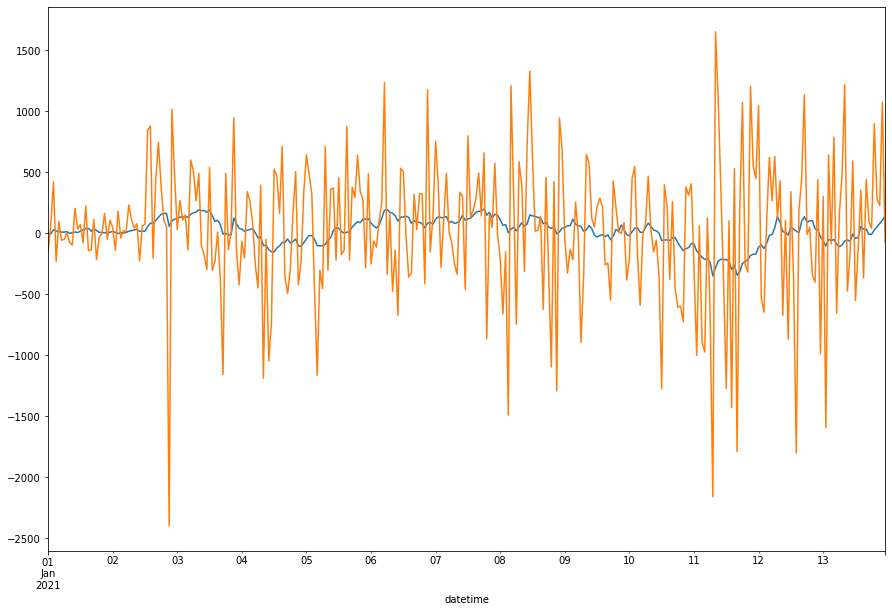

In [284]:
dstart='2021-01-1'
dend='2021-01-13'
rolling_window=24
resample_period='h'
feature='difference'# close, difference, perc

x=btc[feature].resample(resample_period).mean().rolling(rolling_window,min_periods=1).mean()[dstart:dend]
Y=btc[feature].resample(resample_period).mean()[dstart:dend]
print(evaluate_pred(x,Y))
x.plot(figsize=(15,10))
Y.plot(figsize=(15,10))
plt.show()


            m1
me    0.000878
mae   0.046114
mape  0.084727
mse   0.003906
rmse  0.062502


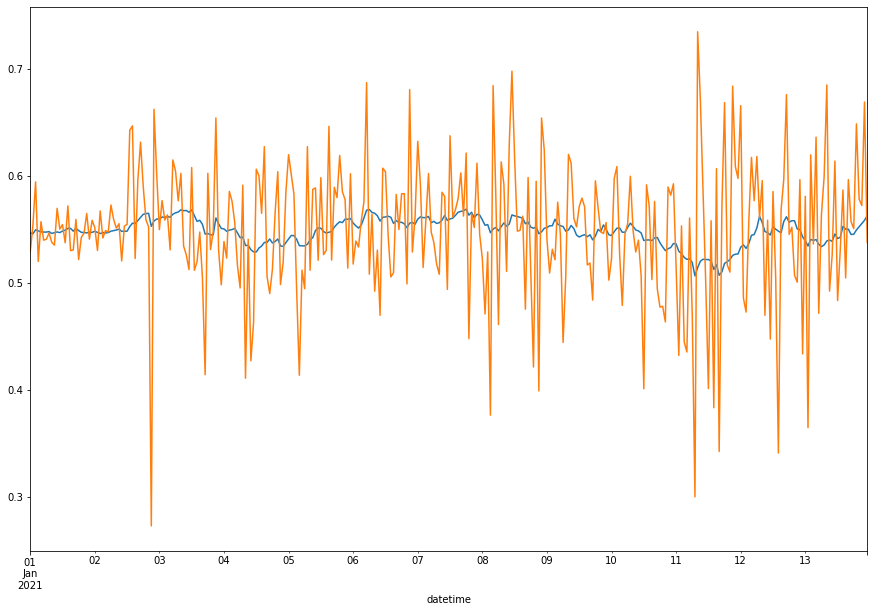

In [362]:
dstart='2021-01-1'
dend='2021-01-13'
rolling_window=24
resample_period='h'
feature='difference'# close, difference, perc

def mmscaler(x):
    return pd.DataFrame(
        MinMaxScaler().fit_transform(np.array(x).reshape(-1,1)),
        index=x.index,columns=[x.name+'_transform'])[x.name+'_transform']

base=btc[feature].resample(resample_period).mean()
base_scale=mmscaler(base)
x=base_scale.rolling(rolling_window,min_periods=1).mean()[dstart:dend]
Y=base_scale[dstart:dend]

MinMaxScaler().transform(x)


print(evaluate_pred(x,Y))
x.plot(figsize=(15,10))
Y.plot(figsize=(15,10))
plt.show()


# EMA

                 m1
me         5.251110
mae      386.179624
mape      28.970464
mse   272957.082967
rmse     522.452948


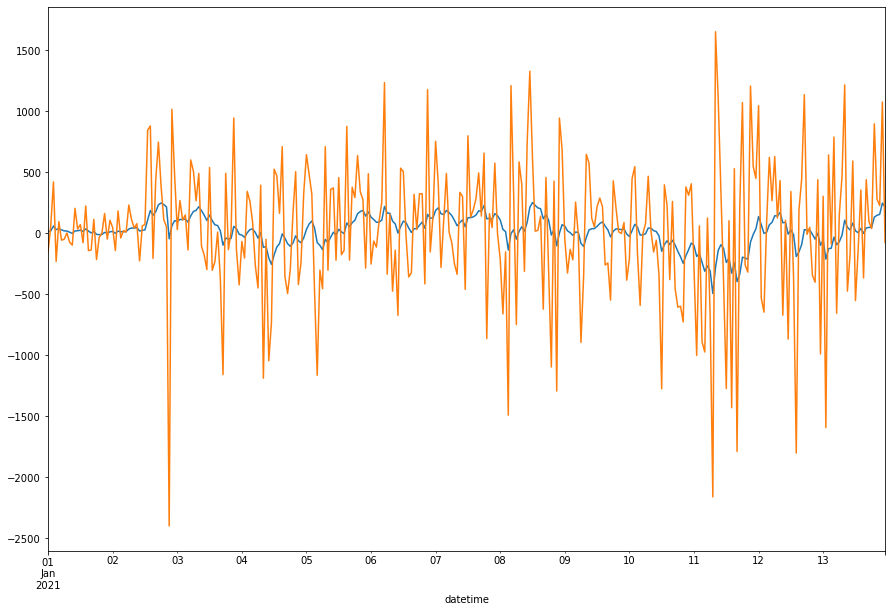

In [283]:
dstart='2021-01-1'
dend='2021-01-13'
alpha=.1
resample_period='h'
feature='difference'# close, difference, perc

x=btc[feature].resample(resample_period).mean().ewm(alpha=alpha,adjust=False).mean()[dstart:dend]
Y=btc[feature].resample(resample_period).mean()[dstart:dend]
print(evaluate_pred(x,Y))
x.plot(figsize=(15,10))
Y.plot(figsize=(15,10))
plt.show()


# CMA

                 m1
me       -12.438141
mae      411.007221
mape      15.984876
mse   315784.266266
rmse     561.946854


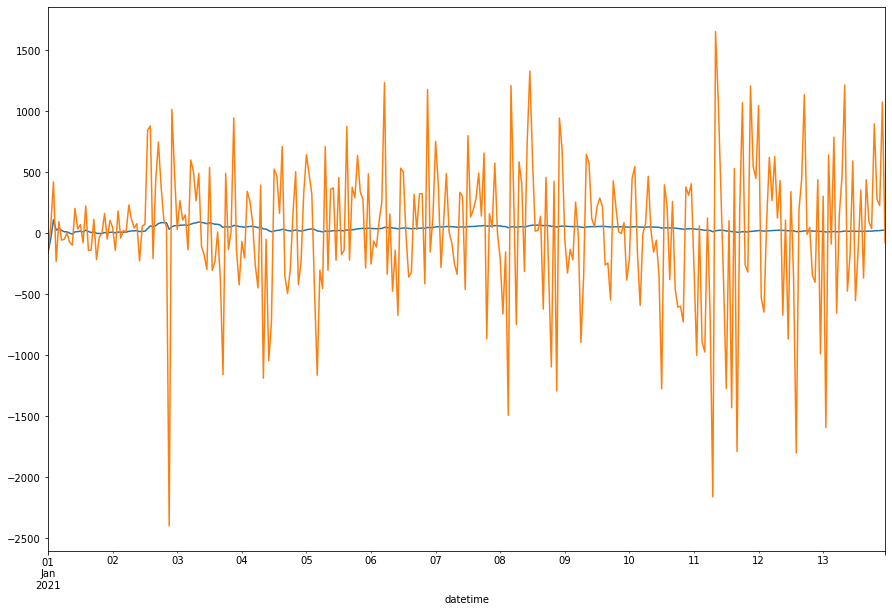

In [269]:
dstart='2021-01-1'
dend='2021-01-13'
resample_period='h'
feature='difference'# close, difference, perc

x=btc[feature].resample(resample_period).mean()[dstart:dend].expanding().mean()
Y=btc[feature].resample(resample_period).mean()[dstart:dend]
print(evaluate_pred(x,Y))
x.plot(figsize=(15,10))
Y.plot(figsize=(15,10))
plt.show()


In [139]:
import plotly.express as px

fig = px.histogram(
    x=[Y[i]-x[i] for i in range(len(x))],
    nbins=50,
    marginal="rug", # can be `box`, `violin`,'rug'
)
fig.show()

In [130]:
[Y[i]-x[i] for i in range(len(x))]

[-236.65571428571482,
 -1.152857142859176,
 342.44571428571464,
 -272.68999999999767,
 75.25857142857058,
 -97.85000000000011,
 -62.2142857142878,
 -32.667142857140526,
 -88.97428571428827,
 -38.55285714285492,
 200.66428571428438,
 39.46428571428675,
 57.90000000000042,
 -86.80857142857141,
 183.23857142856963,
 -173.30428571428536,
 -162.12428571428504,
 101.43714285714408,
 -192.24285714285725,
 5.01142857142726,
 27.362857142858825,
 198.22000000000014,
 -25.584285714288853,
 94.27714285714423,
 43.387142857142734,
 -154.48000000000008,
 139.2242857142867,
 -77.35285714285732,
 3.567142857144063,
 -17.08142857143061,
 187.0957142857156,
 58.8828571428577,
 -37.915714285717385,
 12.77571428571693,
 -265.50714285714326,
 15.458571428569222,
 19.590000000000146,
 704.5457142857148,
 629.8814285714304,
 -421.05142857142914,
 171.19571428571413,
 342.04857142857094,
 -69.00857142856694,
 -345.82428571429045,
 -290.3142857142848,
 -2274.097142857142,
 966.7771428571416,
 427.942857142855